# Métodos de Geração de Distribuição Binomial

In [1]:
import numpy as np 
import random
import scipy.stats
import seaborn as sns

amost_np = np.random.choice(np.arange(0,2),size=200, p=[0.2, 0.8])

amost_np

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1])

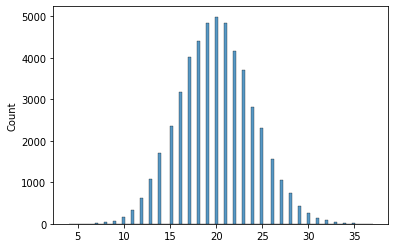

In [2]:
num_am = 50_000
n = 100
p = 0.2
lista = []
lista_1 = []

for k in range(num_am):
    amost_rnd = random.choices([1,0],[p, 1-p], k = n)
    lista.append(amost_rnd)
    lista_1.append(sum(amost_rnd))

sns.histplot(data=lista_1);

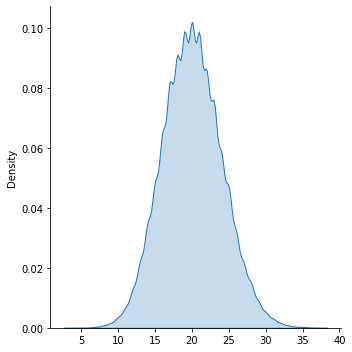

In [3]:
sns.displot(lista_1,kind="kde", fill=True);

## Qual a probabilidade de em 100 amostras termos mais de 24 eventos de sucesso?

In [4]:
ne = 24

len(list(filter(lambda x: x<=ne,lista_1)))/num_am

0.8666

## Solução aproximada pela normal

In [5]:
media = n*p
var = n*p*(1-p)
desv = var**0.5
z = (ne - media)/desv

scipy.stats.norm(0, 1).cdf(z)

0.8413447460685429

In [6]:
n, p = 100, .2  # Tamanho da amostra e probabilidade

ntestes = 20000

s = np.random.binomial(n, p, ntestes) # Testado "ntestes" vezes

sum(s <= 24)/20000

0.8673

## Distribuição da chances de acertar questões de forma aleatória na prova de multipla escolha de 5 alternativas distribuição esperada de pontuações.

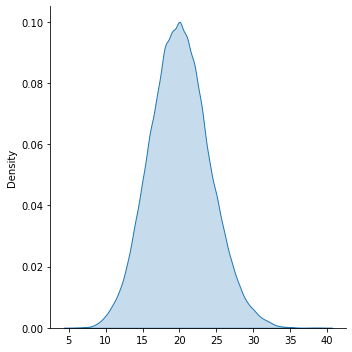

In [7]:
n, p = 100, .2  # Quantidade de questões de uma prova, chances de acerto

ntestes = 20000

s = np.random.binomial(n, p, ntestes) # Testado "ntestes" vezes
sns.displot(s,kind="kde", fill=True);

### Qual a chance de acertar aleatoriamente mais de 37 questões das 100?

In [8]:
print(f'{sum(s >= 37)/ntestes:.6%}')

0.010000%


### Caso a pessoa tenha estudado e melhore suas chances de acerto para 70%, qual a chance de acertar aleatoriamente mais de 85 questões das 100?

0.035000%


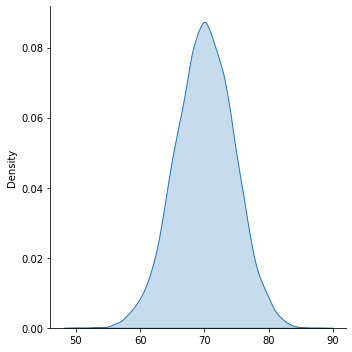

In [9]:
n, p = 100, .7  # Quantidade de questões de uma prova, chances de acerto

ntestes = 20000

s = np.random.binomial(n, p, ntestes) # Testado "ntestes" vezes
sns.displot(s,kind="kde", fill=True);

print(f'{sum(s >= 85)/ntestes:.6%}')

### Em uma prova do CESPE/CEBRASPE Caso a pessoa NÃO tenha estudado as chances de acerto em cada questão será de 50%, considerando a hipotese de marcar todas as 100 questões, sabendo que uma errada anula uma certa?

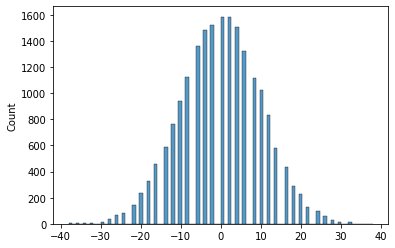

In [10]:
n, p = 100, .5  # Quantidade de questões de uma prova, chances de acerto

num_am = 20_000
lista = []
lista_1 = []

for k in range(num_am):
    amost_rnd = random.choices([1,-1],[p, 1-p], k = n)
    lista.append(amost_rnd)
    lista_1.append(sum(amost_rnd))

sns.histplot(data = lista_1);

### Agora suponha que em uma prova do CESPE/CEBRASPE Caso a pessoa tenha estudado e ;

* As chances de conheça bem 75% da prova (mesmo assim há chances de erro, considerado de 5%);
* 15% da prova ele conheça de forma razoável;
* 10% da prova seriam chutes.

### Marcando Todas

A média dos pontos obtidas na simulação é de 70.545 pontos
Já a média teórica esperada é de 70.5


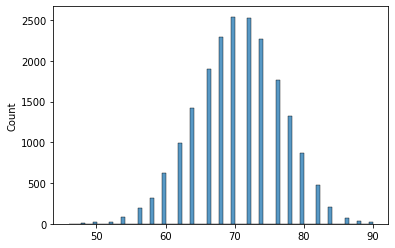

In [11]:
n, p = 75, .95  # Quantidade de questões de uma prova que conhece, chances de acerto
n2, p2 = 15, .6  # Quantidade de questões que tem 75% de dúvida em uma prova, chances de acerto
n3, p3 = 10, .5  # Quantidade chuatadas, chances de acerto

num_am = 20_000
lista = []
lista_1 = []

for k in range(num_am):
    l1 = random.choices([1,-1],[p, 1-p], k = n)
    l2 = random.choices([1,-1],[p2, 1-p2], k = n2)
    l3 = random.choices([1,-1],[p3, 1-p3], k = n3)
    amost_rnd = l1 + l2 + l3
    lista.append(amost_rnd)
    lista_1.append(sum(amost_rnd))

sns.histplot(data = lista_1);

print(f'A média dos pontos obtidas na simulação é de {np.mean(lista_1)} pontos')
print(f'Já a média teórica esperada é de {75*(2*p-1)+15*(2*p2-1)+10*(2*p3-1)}')

### Marcando só as que tem "certeza"

A média dos pontos obtidas na simulação é de 67.50556 pontos
Já a média teórica esperada é de 67.5


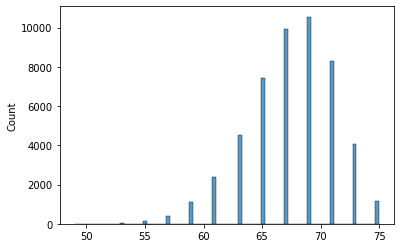

In [12]:
n, p = 75, .95  # Quantidade de questões de uma prova que conhece, chances de acerto
n2, p2 = 15, 0  # Quantidade de questões que tem 75% de dúvida em uma prova, chances de acerto
n3, p3 = 10, 0  # Quantidade chuatadas, chances de acerto

num_am = 50_000
lista = []
lista_1 = []

for k in range(num_am):
    l1 = random.choices([1,-1],[p, 1-p], k = n)
    l2 = random.choices([1,0],[p2, 1-p2], k = n2)
    l3 = random.choices([1,0],[p3, 1-p3], k = n3)
    amost_rnd = l1 + l2 + l3
    lista.append(amost_rnd)
    lista_1.append(sum(amost_rnd))

sns.histplot(data = lista_1);

print(f'A média dos pontos obtidas na simulação é de {np.mean(lista_1)} pontos')
print(f'Já a média teórica esperada é de {75*(2*p-1)}')

## Esses 3 pontos podem fazer falta....